LSTM Stock Prediction

In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Input 
from keras.models import Sequential

**1. Data Collection**

In [73]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end  = now 
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df 

C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\1253508418.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400
2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400
2015-08-27,25.376005,25.447917,24.724301,25.220946,338464400
2015-08-28,25.459162,25.463656,25.065892,25.207468,212657600
2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200
...,...,...,...,...,...
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600


In [74]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400
2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400
2015-08-27,25.376005,25.447917,24.724301,25.220946,338464400
2015-08-28,25.459162,25.463656,25.065892,25.207468,212657600
2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200


In [75]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600
2025-08-20,226.009995,230.470001,225.770004,229.979996,42263900
2025-08-21,224.899994,226.520004,223.779999,226.270004,30621200
2025-08-22,227.759995,229.089996,225.410004,226.169998,42445300


**2. Data Exploration and Visualization**

In [76]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [77]:
df.shape

(2514, 5)

In [78]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.997562,107.062306,104.824850,105.898304,1.070212e+08
std,69.497329,70.181961,68.733502,69.425060,6.082254e+07
min,20.624048,20.927684,20.425434,20.546434,2.323470e+07
25%,40.041642,40.414991,39.679344,39.992502,6.549672e+07
50%,108.462894,109.982771,106.395822,108.744990,9.270200e+07
75%,167.063259,168.389561,165.547799,167.330631,1.302118e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


In [79]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [80]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [81]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-25,23.313026,24.969254,23.259093,24.969254,414406400
1,2015-08-26,24.650146,24.695091,23.607420,24.065859,387098400
2,2015-08-27,25.376005,25.447917,24.724301,25.220946,338464400
3,2015-08-28,25.459162,25.463656,25.065892,25.207468,212657600
4,2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200


Text(0.5, 1.0, 'AAPL')

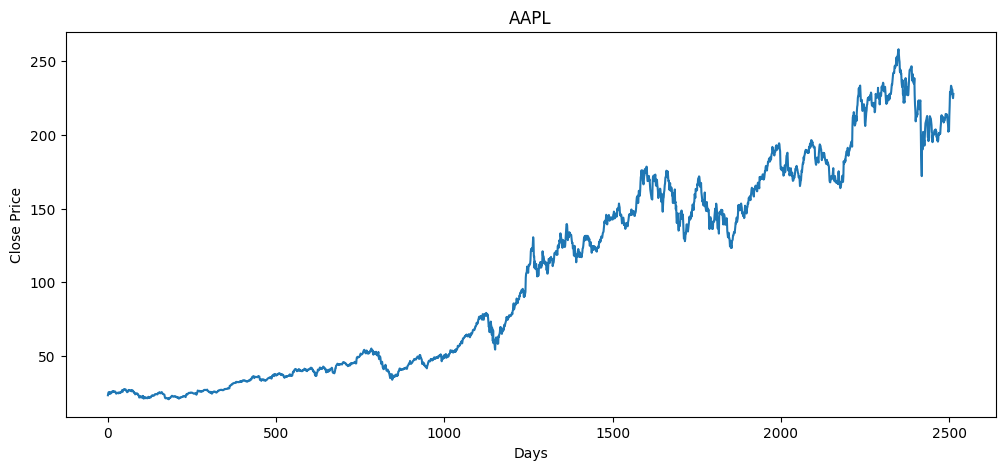

In [82]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title(ticker)

**3. Feature Engineering**

In [83]:
temp_data = [10, 15, 20, 18, 30, 22, 25, 32, 35, 38]
print(sum(temp_data[1:6])/5)

21.0


In [84]:
df1 = pd.DataFrame([10, 15, 20, 18, 30, 22, 25, 32, 35, 38])
df1

,0
0,10
1,15
2,20
3,18
4,30
5,22
6,25
7,32
8,35
9,38


In [85]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,18.6
5,21.0
6,23.0
7,25.4
8,28.8
9,30.4


100 days moving average 

In [86]:
df['MA_100'] = df.Close.rolling(100).mean()

In [87]:
df['MA_100'].head(103)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
98           NaN
99     25.291379
100    25.276398
101    25.248340
102    25.211917
Name: MA_100, Length: 103, dtype: float64

Text(0.5, 1.0, '100 Days Moving Average')

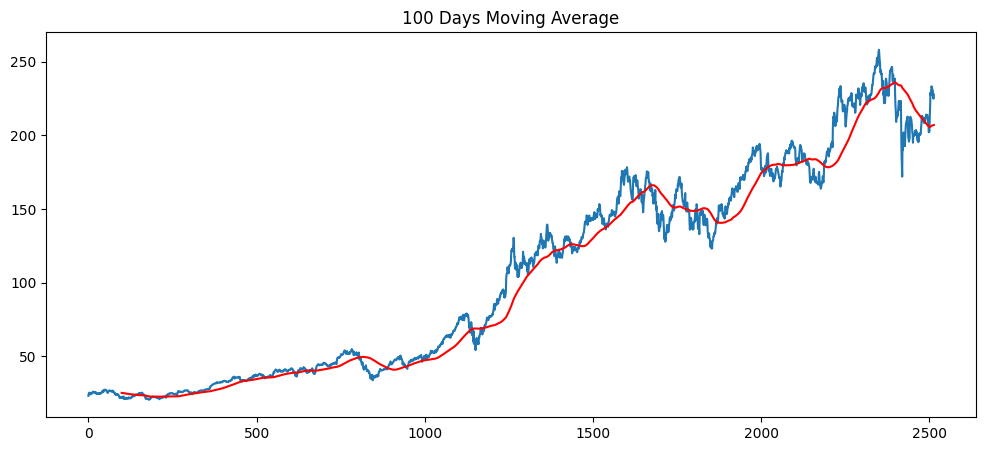

In [88]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')

200 days MA

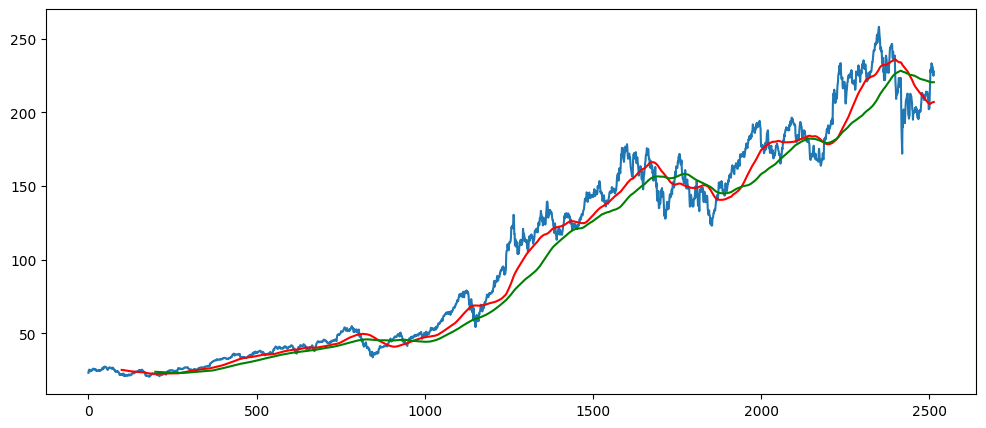

In [89]:
df['MA_200'] = df.Close.rolling(200).mean()
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')

Calculating % Changed in each trading session

In [90]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,23.313026,NaN
1,24.650146,0.057355
2,25.376005,0.029446
3,25.459162,0.003277
4,25.340055,-0.004678
...,...,...
2509,230.889999,-0.003023
2510,230.559998,-0.001429
2511,226.009995,-0.019735


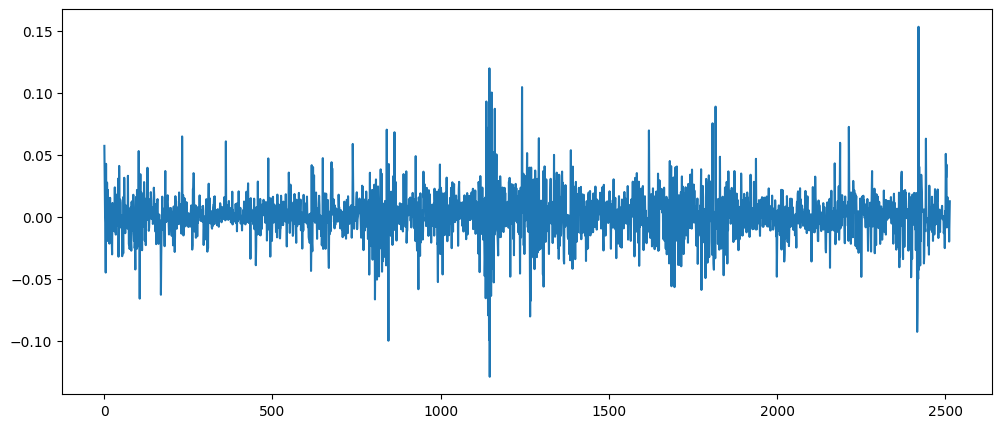

In [91]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

**4. Data Processing**

In [92]:
# Splitting data into Training and Testing 
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1759, 1)
(755, 1)


In [93]:
# Scaling down the data between 0 and 1
# For the LSTM models, we have to scale down the data, we cannot just provide this data as it is, 
# We nee to kind of normalize the data between 0 and 1

In [94]:
scaler = MinMaxScaler(feature_range=(0,1))

In [95]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01703836],
       [0.02551085],
       [0.03011015],
       ...,
       [0.94866261],
       [0.95814396],
       [0.9556489 ]], shape=(1759, 1))

**5. Sequence Creation**

In [96]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

**6. Model Building**

In [97]:
#ML Model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1))

d:\workspace\django-react_fullstack\stock-prediction-portal\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'Dropout' is not defined

In [ ]:
model = Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

**7. Model Training**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.tit(x_train, y_train)

In [ ]:
model.summary()

In [ ]:
model.save('keras_model.keras')

**8. Preparing Test Data**

In [ ]:
data_training.tail(100)

Ticker,AAPL
1659,172.378082
1660,175.676468
1661,174.508270
1662,171.406265
1663,171.111740
...,...
1754,169.425537
1755,170.498596
1756,170.341080
1757,171.837463


In [ ]:
past_100_days = data_training.tail(100)
type(past_100_days)

pandas.core.frame.DataFrame

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Ticker,AAPL
0,172.378082
1,175.676468
2,174.508270
3,171.406265
4,171.111740


In [98]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)